In [9]:
import pandas as pd 
import re
import numpy as np

### csv File  one arabice and robusta and merged_file

In [12]:
df_arabice = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\Final-Project\arabica_data_cleaned.csv")

In [14]:
df_arabice[df_arabice['Farm.Name']=='various'].head(60)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
84,85,Arabica,exportadora de cafe condor s.a,Colombia,various,NaN,trilladora agricola,3-68-0102,exportadora de cafe condor s.a,1550 msnm,...,Green,0,"April 7th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1550.0,1550.0,1550.0
99,100,Arabica,"el equimite, cafetal biodinámico",Mexico,various,Mezcla Veracruz 01,"cafetal el equimite, rancho agroecológico",NaN,"cafetal el equimite, rancho agroecológico, s.p...",1300,...,Green,3,"September 21st, 2017",Centro Agroecológico del Café A.C.,3b8dfdd621590b424ff64e0b76df7d6a92e1c628,d470dc009281519e30da6ead1c649fcd7670f386,m,1300.0,1300.0,1300.0
133,134,Arabica,eric thormaehlen,Costa Rica,various,NaN,coricafe sa,5-0048-0052,coricafe s.a.,1200,...,Green,4,"March 5th, 2015",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1200.0,1200.0,1200.0
155,156,Arabica,exportadora de cafe condor s.a,Colombia,various,NaN,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0
283,284,Arabica,eric thormaehlen,Costa Rica,various,NaN,coricafe sa,5-0048-0145,coricafe s.a.,1200-1400,...,Green,3,"June 9th, 2015",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1200.0,1400.0,1300.0
324,325,Arabica,exportadora de cafe condor s.a,Colombia,various,NaN,trilladora boananza,3-68-0021,exportadora de cafe condor s.a,1750 msnm,...,Green,3,"October 29th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
391,392,Arabica,exportadora de cafe condor s.a,Colombia,various,NaN,trilladora boananza,3-68-0147,exportadora de cafe condor s.a,1450 msnm,...,Green,2,"June 26th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1450.0,1450.0,1450.0
396,397,Arabica,exportadora de cafe condor s.a,Colombia,various,68-0054,bonanza - armenia,68-0054,exportadora de cafe condor s.a,1650,...,NaN,0,"November 8th, 2017",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1650.0,1650.0,1650.0
401,402,Arabica,exportadora de cafe condor s.a,Colombia,various,NaN,trilladora agricola,3-68-0103,exportadora de cafe condor s.a,1650 msnm,...,Green,1,"April 7th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1650.0,1650.0,1650.0
429,430,Arabica,calixto guillen vazquez,Mexico,various,NaN,productores de cafes especiales sc,2406,"finca triunfo verde, s.c.",1300,...,Green,6,"March 29th, 2014",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1300.0,1300.0,1300.0


In [16]:
df_robutsta = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\Final-Project\robusta_data_cleaned.csv")

In [153]:
pd.set_option('display.max_columns',None)

In [155]:
df_merged = pd.read_csv(r"C:\Users\sarah\OneDrive\Documentos\GitHub\Final-Project\merged_data_cleaned.csv")

### Cleaning and Wrangling the dataset 

##### Clean the column name and remove any unnecessary ones.

In [159]:
df_merged.drop(['Unnamed: 0', 'Owner.1', 'Certification.Address', 'Certification.Contact','Certification.Body', 'Lot.Number','Mill', 'ICO.Number','Altitude','Variety','altitude_low_meters', 'altitude_high_meters'], axis=1, inplace=True)

In [160]:
df_merged.rename(columns={'Country.of.Origin':'Country_of_Origin', 'Farm.Name': 'Farm_Name','Number.of.Bags': 'Number_of_Bags','Bag.Weight': 'Bag_Weight', 'In.Country.Partner': 'In_Country_Partner', 
                          'Harvest.Year': 'Harvest_Year' , 'Grading.Date':'Grading_Date', 'Processing.Method': 'Processing_Method', 'Clean.Cup': 'Clean_Cup', 
                          'Cupper.Points':'Cupper_Points', 'Total.Cup.Points': 'Total_Cup_Points', 'Category.One.Defects': 'Category_One_Defects',
                          'Category.Two.Defects': 'Category_Two_Defects'},inplace=True)


#### Check for missing or duplicate data and types.

In [162]:
df_merged.dtypes

Species                  object
Owner                    object
Country_of_Origin        object
Farm_Name                object
Company                  object
Region                   object
Producer                 object
Number_of_Bags            int64
Bag_Weight               object
In_Country_Partner       object
Harvest_Year             object
Grading_Date             object
Processing_Method        object
Aroma                   float64
Flavor                  float64
Aftertaste              float64
Acidity                 float64
Body                    float64
Balance                 float64
Uniformity              float64
Clean_Cup               float64
Sweetness               float64
Cupper_Points           float64
Total_Cup_Points        float64
Moisture                float64
Category_One_Defects      int64
Quakers                 float64
Color                    object
Category_Two_Defects      int64
Expiration               object
unit_of_measurement      object
altitude

In [163]:
df_merged.isna().sum()

Species                   0
Owner                     7
Country_of_Origin         1
Farm_Name               359
Company                 209
Region                   59
Producer                232
Number_of_Bags            0
Bag_Weight                0
In_Country_Partner        0
Harvest_Year             47
Grading_Date              0
Processing_Method       170
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean_Cup                 0
Sweetness                 0
Cupper_Points             0
Total_Cup_Points          0
Moisture                  0
Category_One_Defects      0
Quakers                   1
Color                   270
Category_Two_Defects      0
Expiration                0
unit_of_measurement       0
altitude_mean_meters    230
dtype: int64

In [164]:
df_merged.nunique() 

Species                   2
Owner                   315
Country_of_Origin        36
Farm_Name               571
Company                 281
Region                  356
Producer                692
Number_of_Bags          131
Bag_Weight               56
In_Country_Partner       27
Harvest_Year             46
Grading_Date            567
Processing_Method         5
Aroma                    33
Flavor                   35
Aftertaste               35
Acidity                  31
Body                     33
Balance                  33
Uniformity               10
Clean_Cup                11
Sweetness                17
Cupper_Points            42
Total_Cup_Points        180
Moisture                 23
Category_One_Defects     18
Quakers                  11
Color                     3
Category_Two_Defects     38
Expiration              566
unit_of_measurement       2
altitude_mean_meters    211
dtype: int64

### Filling in the missing data using the mode

In [166]:
##impute average altitude by region or country
df_merged["altitude_mean_meters"] = df_merged.groupby("Region")["altitude_mean_meters"].transform(
    lambda x: x.fillna(x.mean()))
#rename the column
df_merged.rename(columns= {'altitude_mean_meters': 'Altitude_Mean_Meters', 'unit_of_measurement': 'Unit_Of_Measurement'},inplace = True)

In [167]:
df_merged.Altitude_Mean_Meters.isna().sum()

81

In [168]:
#most frequent value

def get_mode(series):
    mode = series.mode()
    return mode[0] if not mode.empty else None


In [169]:
##some missing region
#['Region']['Country_of_Origin']
#mapping from Owner -> most common Farm_Name
region_to_country = df_merged.groupby('Country_of_Origin')['Region'].apply(get_mode).to_dict()


In [170]:
#mapping to fill NaN values in Farm_Name
df_merged['Region'] = df_merged.apply(
    lambda row: region_to_country[row['Country_of_Origin']] if pd.isna(row['Region']) and row['Country_of_Origin'] in region_to_country else row['Region'],
    axis=1)

In [171]:
df_merged.Region.isna().sum()

1

In [172]:
#mapping from Owner -> most common Farm_Name
owner_to_farm = df_merged.groupby('Owner')['Farm_Name'].apply(get_mode).to_dict()


In [173]:
#mapping to fill NaN values in Farm_Name
df_merged['Farm_Name'] = df_merged.apply(
    lambda row: owner_to_farm[row['Owner']] if pd.isna(row['Farm_Name']) and row['Owner'] in owner_to_farm else row['Farm_Name'],
    axis=1)

In [174]:
df_merged.Farm_Name.isna().sum()

208

In [175]:
#mapping from Owner -> most common Farm_Name
region_to_farm = df_merged.groupby('Region')['Farm_Name'].apply(get_mode).to_dict()


In [176]:
df_merged['Farm_Name'] = df_merged.apply(
    lambda row: region_to_farm[row['Region']] if pd.isna(row['Farm_Name']) and row['Region'] in region_to_farm else row['Farm_Name'],
    axis=1)

In [177]:
df_merged.Farm_Name.isna().sum()

36

###  cleaning

#### remove Chinese characters

In [181]:
import re

def remove_chinese(text):
    if isinstance(text, str):
        return re.sub(r'[\u4e00-\u9fff]+', '', text)
    return text

# Apply it to all string columns in the entire DataFrame
df_merged = df_merged.applymap(remove_chinese)


C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\1857847465.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged = df_merged.applymap(remove_chinese)


### Show all columns

In [183]:
df_merged
pd.set_option('display.max_columns', None)  


##### cleaning bag weight

In [185]:
df_merged.Bag_Weight.unique() 

array(['60 kg', '1', '30 kg', '69 kg', '1 kg', '2 kg,lbs', '6', '3 lbs',
       '50 kg', '2 lbs', '100 lbs', '15 kg', '2 kg', '2', '70 kg',
       '19200 kg', '5 lbs', '1 kg,lbs', '6 kg', '0 lbs', '46 kg', '40 kg',
       '20 kg', '34 kg', '1 lbs', '660 kg', '18975 kg', '12000 kg',
       '35 kg', '66 kg', '80 kg', '132 lbs', '5 kg', '25 kg', '59 kg',
       '18000 kg', '150 lbs', '9000 kg', '18 kg', '10 kg', '29 kg',
       '1218 kg', '4 lbs', '0 kg', '13800 kg', '1500 kg', '24 kg',
       '80 lbs', '8 kg', '3 kg', '350 kg', '67 kg', '4 kg', '55 lbs',
       '100 kg', '130 lbs'], dtype=object)

In [186]:
def clean_bag_weight_stepwise(value):
    if pd.isna(value):
        return value  # Keep NaN as is

    # 1. Replace commas with space
    value = str(value).replace(',', ' ')

    # 2. Remove all instances of 'lbs', 'lb'
    value = re.sub(r'\lbs?\lb', '', value, flags=re.IGNORECASE)

    # 3. Remove multiple spaces and strip
    value = re.sub(r'\s+', ' ', value).strip()

    return value

##### check and fill the null value and correct the name 

In [188]:
df_merged.Region.unique() 

array(['guji-hambela', 'oriente', 'oromia', 'south of minas',
       'san ignacio', 'oromiya', 'snnp/kaffa zone,gimbowereda',
       'antioquia', 'kona', 'sulawesi', 'yirgacheffe', 'yunnan', 'gedio',
       'san ramon', 'xalapa', 'sidamo', 'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'jinotega', 'arusha',
       'vale da grama', 'west and central valley', 'muranga',
       'chiang rai', 'sul de minas - carmo de minas', 'natou county',
       'nyeri', 'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'santander',
       'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'ar

In [189]:
df_merged['Region'] = df_merged['Region'].str.strip()
unique_regions = sorted(df_merged['Region'].dropna().unique())

In [255]:
region_cleaning_map = {
    'oromiya': 'oromia',
    'chiangrai': 'chiang rai',
    'chiang rai thailand': 'chiang rai',
    'ethiopia, sidamo': 'sidamo',
    'snnprg; kafa; telo woreda; shada kebele': 'kaffa',
    'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.': 'kaffa',
    'sul de minas - carmo de minas': 'carmo de minas',
    'ataco, apaneca - ilamatepec mountain range': 'apaneca mountain',
    '(dongshan dist., tainan city)': 'dongshan district',
    'campos altos - cerrado': 'campos altos',
    'chapadão de ferro (cerrado mineiro)': 'chapadão de ferro',
    '52 narino (exact location: mattituy; municipal region: florida code 381': np.nan,
    'xochitonalco, huautla        ': 'xochitonalco, huautla',
    'blend': np.nan,
    'mmm': np.nan,
    'test': np.nan,
    '60': np.nan,
    '( Dongshan Dist., Tainan City)': 'Tainan City'
}

In [257]:
df_merged['Region'] = df_merged['Region'].replace(region_cleaning_map)

C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\4053053278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Region'] = df_merged['Region'].replace(region_cleaning_map)


#### change first letter to uppercase 

In [218]:
df_merged[['Region', 'Company', 'Farm_Name', 'Owner']] = df_merged[['Region', 'Company', 'Farm_Name', 'Owner']].apply(lambda col: col.str.title())
df_merged

,Species,Owner,Country_of_Origin,Farm_Name,Company,Region,Producer,Number_of_Bags,Bag_Weight,In_Country_Partner,Harvest_Year,Grading_Date,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Color,Category_Two_Defects,Expiration,Unit_Of_Measurement,Altitude_Mean_Meters
0,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",m,2075.0
1,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",m,2075.0
2,Arabica,Grounds For Health Admin,Guatemala,"San Marcos Barrancas ""San Cristobal Cuch",NaN,Oriente,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",m,NaN
3,Arabica,Yidnekachew Dabessa,Ethiopia,Yidnekachew Dabessa Coffee Plantation,Yidnekachew Debessa Coffee Plantation,Oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",m,2000.0
4,Arabica,Metad Plc,Ethiopia,Metad Plc,Metad Agricultural Developmet Plc,Guji-Hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",m,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,Luis Robles,Ecuador,Robustasa,Robustasa,"San Juan, Playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",m,40.0
1335,Robusta,Luis Robles,Ecuador,Robustasa,Robustasa,"San Juan, Playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",m,40.0
1336,Robusta,James Moore,United States,Fazenda Cazengo,Global Opportunity Fund,"Kwanza Norte Province, Angola",Cafe Cazengo,1,1 kg,Specialty Coffee Association,2014,"December 23rd, 2014",Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,NaN,6,"December 23rd, 2015",m,795.0
1337,Robusta,Cafe Politico,India,Unkown,Cafe Politico,Chikmagalur,NaN,1,5 lbs,Specialty Coffee Association,2013,"August 25th, 2014",Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,Green,1,"August 25th, 2015",m,NaN


#### Country drop the 1 null value

In [221]:
df_merged = df_merged.dropna(subset=['Country_of_Origin'])

In [223]:
df_merged.isna().sum()

Species                   0
Owner                     7
Country_of_Origin         0
Farm_Name                35
Company                 208
Region                    5
Producer                231
Number_of_Bags            0
Bag_Weight                0
In_Country_Partner        0
Harvest_Year             46
Grading_Date              0
Processing_Method       169
Aroma                     0
Flavor                    0
Aftertaste                0
Acidity                   0
Body                      0
Balance                   0
Uniformity                0
Clean_Cup                 0
Sweetness                 0
Cupper_Points             0
Total_Cup_Points          0
Moisture                  0
Category_One_Defects      0
Quakers                   1
Color                   269
Category_Two_Defects      0
Expiration                0
Unit_Of_Measurement       0
Altitude_Mean_Meters     80
dtype: int64

In [225]:
df_merged['High_Quality'] = df_merged['Total_Cup_Points'].apply(lambda x: 1 if x > 85 else 0)

C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\3613876036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['High_Quality'] = df_merged['Total_Cup_Points'].apply(lambda x: 1 if x > 85 else 0)


##### clean bag_weight and convert it to kg and reduce the null values

In [227]:
import re

def convert_weight(value):
    value = str(value).lower().replace(',', '').strip()  # Remove commas and extra spaces
    
    # Extract numeric part using regex
    match = re.search(r'(\d+\.?\d*)', value)  # Finds numbers, including decimals
    if match:
        num_value = float(match.group(1))  # Convert extracted number to float
        if 'lbs' in value:
            return num_value * 0.453592  # Convert pounds to kilograms
        elif 'kg' in value:
            return num_value  
        else:
            return None  # Handle unknown units
    return None  

df_merged['Bag_Weight'] = df_merged['Bag_Weight'].apply(convert_weight).round()

C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\972937985.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Bag_Weight'] = df_merged['Bag_Weight'].apply(convert_weight).round()


In [228]:
df_merged.Bag_Weight.isna().sum()

27

In [232]:
# Save DataFrame to an Excel file
df_merged.to_excel("cleaned_data.xlsx", index=False)  # Saves without row numbers

### split the data to two: one for the loc (like country region etc) and quality (aroma flavor etc)

In [234]:
df_loc = df_merged[['Species', 'Owner', 'Country_of_Origin', 'Farm_Name', 'Company',
       'Region', 'Producer', 'Number_of_Bags', 'Bag_Weight',
       'In_Country_Partner', 'Harvest_Year', 'Grading_Date',
       'Processing_Method']].copy()

In [235]:
df_quality = df_merged[['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
    'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points',
    'Total_Cup_Points', 'Moisture', 'Category_One_Defects', 'Quakers', 'Category_Two_Defects']].copy()

In [239]:
df_quality

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects
0,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,0
1,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,1
2,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,0
3,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,2
4,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,1
1335,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,0
1336,7.33,7.33,7.17,7.42,7.50,7.17,9.33,9.33,7.42,7.17,77.17,0.00,0,0.0,6
1337,7.42,6.83,6.75,7.17,7.25,7.00,9.33,9.33,7.08,6.92,75.08,0.10,20,0.0,1


### Data Analyse (Quality Correlations) 
##### Total Cup Points almost highst Correlation in Quality

* Group Region by average `Total_Cup_Points`
* Compare average quality by `Country_of_Origin`
* Analyze impact of `Processing_Method` on quality
* Rank top `Farm_Name` by `Cupper_Points`


In [333]:
# Standardized region names
regions_to_replace = {
    'Natou County': 'Nantou County',
    'Kapchorwa Eastern': 'Kapchorwa',
    'Sipi, Mt Elgon': 'Sipi, Mount Elgon',
    'Nuevo Oriente': 'Oriente',
    'Minas Gerais, Br': 'Minas Gerais',
    'Aceh Tengah': 'Aceh',
    'Sacatepequez, Guatemala': 'Sacatepéquez',
    'Nkure- Meru': 'Meru',
    'Mt. Rwenzori': 'Mount Rwenzori',
    'Aceh Gayo': 'Aceh',
    'Ngorogoro': 'Ngorongoro',
    'Siltepec El Triunfo, Chiapas, Mexico': 'Siltepec El Triunfo',
    'Doi Chaang Village, Chiang Rai, Thialand': 'Doi Chaang Village, Chiang Rai',
    'Guinope El Paraíso': 'Guinope, El Paraíso',
    'Pyin Oo Lwin': 'Pyinoolwin',
    'Baihe Dist., Tainan City': 'Baihe District, Tainan City',
    'Chiayi Fanlu': 'Fanlu, Chiayi',
    'Cerrado - Monte Carmelo - Minas Gerais': 'Minas Gerais',
    'Department D\'Artibonite , Haiti': 'Artibonite Department',
    'Yauk Sauk, Shan State': 'Yauk Sauk',
    'Sierra Norte Yajalon, Chiapas': 'Sierra Norte, Yajalon, Chiapas',
    'Snnp/Kaffa Zone,Gimbowereda': 'Kaffa Zone Gimbo Woreda'
}

# Apply the replacement to the 'Region' column
df_merged['Region'] = df_merged['Region'].replace(regions_to_replace, regex=False)


C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\2736897139.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Region'] = df_merged['Region'].replace(regions_to_replace, regex=False)


In [335]:
df_merged.Region.unique() 

array(['Guji-Hambela', 'Oriente', 'Oromia', 'South Of Minas',
       'San Ignacio', 'Kaffa Zone Gimbo Woreda', 'Antioquia', 'Kona',
       'Sulawesi', 'Yirgacheffe', 'Yunnan', 'Gedio', 'San Ramon',
       'Xalapa', 'Sidamo', 'Kapchorwa', 'Comayagua',
       'Leye, Alishan Township, Chiayi County', 'Jinotega', 'Arusha',
       'Vale Da Grama', 'West And Central Valley', 'Muranga',
       'Chiang Rai', 'Carmo De Minas', 'Nantou County', 'Nyeri',
       'Eastern Uganda', 'Tolima', 'Kiambu', 'Sipi, Mount Elgon',
       'Eastern', 'Huila', 'Boquete', 'Acatenango', 'Addis Ababa',
       'Cajamarca', 'Eastern Highlands Province', 'Apaneca',
       'Apaneca Mountain', 'Kirinyaga', 'Bulambuli Eastern Region',
       'Huehuetenango', 'West Valley', 'Central Kenya', 'Santander',
       'Lintong', 'Kaffa', 'Pasto', 'Aricha', 'Cundinamarca', 'Tarrazu',
       'Veracruz', 'Grama Valley', 'Mexico', 'Chuva, San Marcos', 'Mbeya',
       'Coatepec', 'Dongshan Dist., Tainan City', 'Thailand', 'Marcala',


In [337]:
df_merged.groupby('Region')['Total_Cup_Points'].mean().round(2)

Region
                         82.40
Acatenango               85.06
Aceh                     82.93
Ada Okinawa Japan        84.67
Addis Ababa              85.75
                         ...  
Ywar Ngan Township       81.50
Zapotitlan De Mendez     82.50
Zaragoza Itundujia       78.63
Zentla                   79.33
Zihuatanejo De Azueta    82.42
Name: Total_Cup_Points, Length: 328, dtype: float64

In [330]:
average_quality_by_region = df_merged.groupby('Region')['Total_Cup_Points'].mean().sort_values(ascending=False).round(2)
average_quality_by_region = average_quality_by_region.reset_index()
average_quality_by_region

,Region,Total_Cup_Points
0,Guji-Hambela,89.78
1,Kaffa Zone Gimbo Woreda,88.25
2,Sulawesi,87.42
3,Gedio,87.25
4,Oromia,86.58
...,...,...
323,Marmelade,72.33
324,Tlatlauquitepec,71.08
325,"Sierra Norte, Yajalon, Chiapas",70.75
326,Juchique De Ferrer,68.33


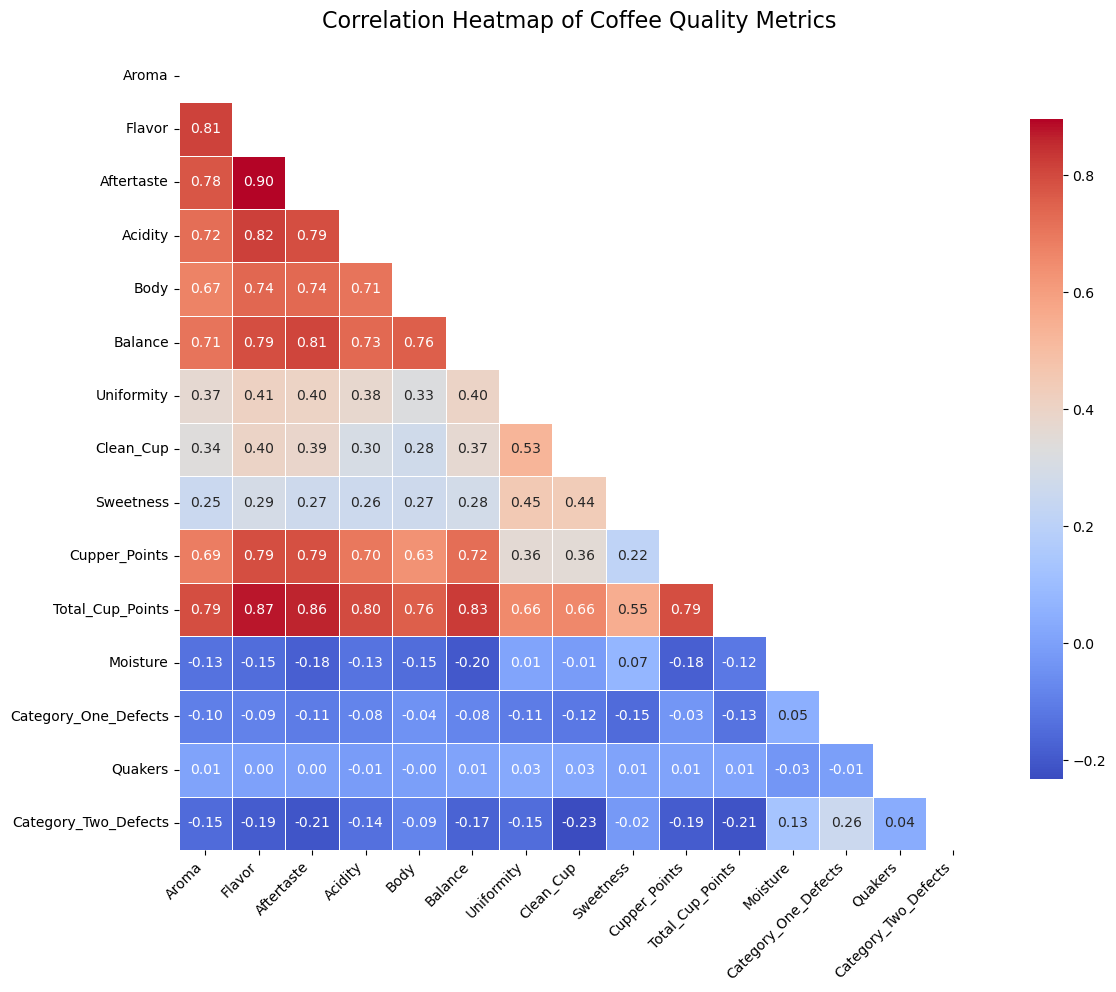

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))  # Bigger size for better readability
corr = df_quality.corr()

# Optional: Mask upper triangle for cleaner layout
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",                # Limit decimals to 2
    cmap="coolwarm",          # You can also try 'vlag', 'RdBu_r', or 'Spectral'
    linewidths=0.5,           # Thin lines between cells
    linecolor='white',
    mask=mask,                # Optional: hide upper triangle
    square=True,              # Make cells square
    cbar_kws={"shrink": 0.8}  # Resize color bar
)

plt.title("Correlation Heatmap of Coffee Quality Metrics", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right')  # Improve label readability
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [319]:
df_merged.Country_of_Origin.unique() 

array(['Ethiopia', 'Guatemala', 'Brazil', 'Peru', 'United States',
       'Indonesia', 'China', 'Costa Rica', 'Mexico', 'Uganda', 'Honduras',
       'Taiwan', 'Nicaragua', 'Tanzania', 'Kenya', 'Thailand', 'Colombia',
       'Panama', 'Papua New Guinea', 'El Salvador', 'Japan', 'Ecuador',
       'Haiti', 'Burundi', 'Vietnam', 'Philippines', 'Rwanda', 'Malawi',
       'Laos', 'Zambia', 'Myanmar', 'Mauritius', "Côte d'Ivoire", 'India'],
      dtype=object)

In [321]:
df_merged['Country_of_Origin'] = df_merged['Country_of_Origin'].replace({
    'Tanzania, United Republic Of': 'Tanzania',
    'Cote d?Ivoire': "Côte d'Ivoire",
    'United States (Hawaii)': 'United States',
    'United States (Puerto Rico)': 'United States',
    'United Kingdom (England)': 'United Kingdom',
    'United Kingdom (Scotland)': 'United Kingdom',
    'United Kingdom (Wales)': 'United Kingdom',
    'UK': 'United Kingdom',
    'Great Britain': 'United Kingdom'
})

C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\3029469557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Country_of_Origin'] = df_merged['Country_of_Origin'].replace({


In [323]:
average_quality_by_country = df_merged.groupby('Country_of_Origin')['Total_Cup_Points'].mean().sort_values(ascending=False).round(2)
average_quality_by_country = average_quality_by_country.reset_index()
average_quality_by_country

,Country_of_Origin,Total_Cup_Points
0,Papua New Guinea,85.75
1,Ethiopia,85.48
2,Japan,84.67
3,Kenya,84.31
4,Panama,83.71
5,Uganda,83.45
6,Colombia,83.11
7,El Salvador,83.05
8,China,82.93
9,Rwanda,82.83


In [355]:
df_merged.Processing_Method.isna().sum()

169

In [359]:
#filling in missing values based on similar rows (same Region)

df_merged['Processing_Method'] = df_merged.groupby('Region')['Processing_Method'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x
)


C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\1911157433.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Processing_Method'] = df_merged.groupby('Region')['Processing_Method'].transform(


In [369]:
df_merged['Processing_Method'] = df_merged['Processing_Method'].fillna('Unknown')

C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\3393265557.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Processing_Method'] = df_merged['Processing_Method'].fillna('Unknown')


In [371]:
df_merged.Processing_Method.isna().sum()

0

In [373]:
quality_by_processing = df_merged.groupby('Processing_Method')['Total_Cup_Points'].mean().sort_values(ascending=False).round(2)
quality_by_processing

Processing_Method
Pulped natural / honey       82.81
Semi-washed / Semi-pulped    82.78
Natural / Dry                82.43
Washed / Wet                 81.96
Unknown                      81.83
Other                        81.28
Name: Total_Cup_Points, dtype: float64

In [378]:
quality_by_processing = quality_by_processing.reset_index()
quality_by_processing

,index,Processing_Method,Total_Cup_Points
0,0,Pulped natural / honey,82.81
1,1,Semi-washed / Semi-pulped,82.78
2,2,Natural / Dry,82.43
3,3,Washed / Wet,81.96
4,4,Unknown,81.83
5,5,Other,81.28


C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\4046613939.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quality_by_processing, x='Total_Cup_Points', y='Processing_Method', palette='viridis')


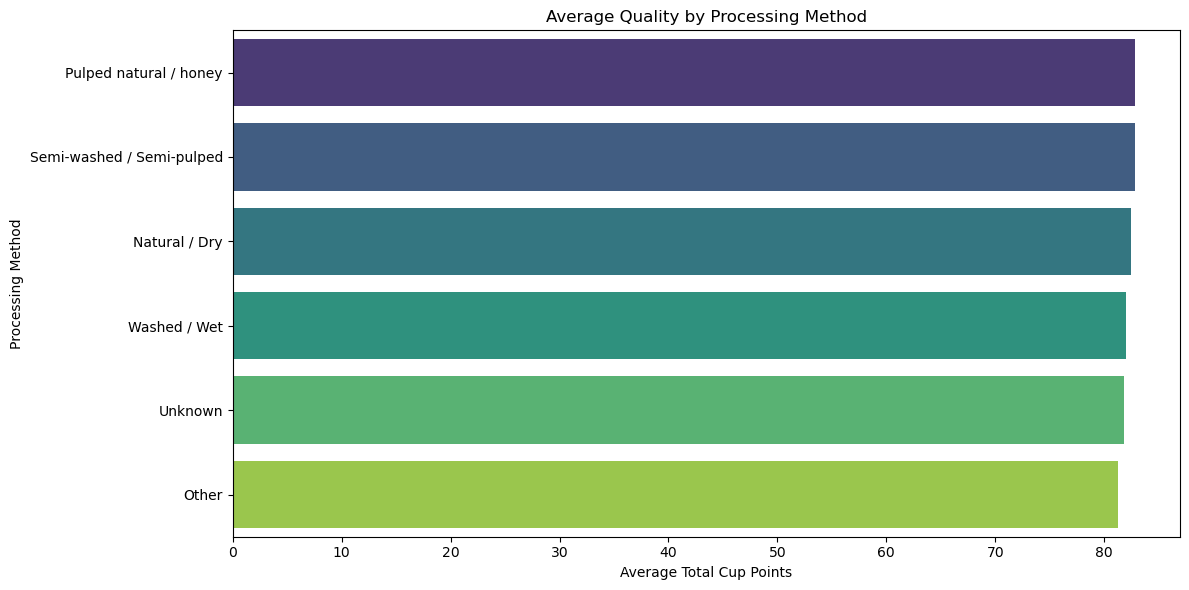

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=quality_by_processing, x='Total_Cup_Points', y='Processing_Method', palette='viridis')
plt.title('Average Quality by Processing Method')
plt.xlabel('Average Total Cup Points')
plt.ylabel('Processing Method')
plt.tight_layout()
plt.show()


In [388]:
from scipy.stats import f_oneway

# Prepare samples for each processing method
methods = df_merged['Processing_Method'].dropna().unique()
samples = [df_merged[df_merged['Processing_Method'] == m]['Total_Cup_Points'].dropna() for m in methods]

# Perform one-way ANOVA
anova_result = f_oneway(*samples)
print("ANOVA p-value:", anova_result.pvalue)


ANOVA p-value: 0.11701027786381672


- 0.117 > 0.05 → The result is not statistically significant.

- This means we cannot confidently say that the processing method has a meaningful impact on Total_Cup_Points based on this dataset.

- The differences in average quality across processing methods might simply be due to random variation, not because one method is truly better.

In [416]:
top_region = df_merged.groupby('Region')['Cupper_Points'].mean().round(2).sort_values(ascending=False)
top_10_region = top_region.head(10)
#A summary of how much the cupper liked the coffee overall, beyond just its technical traits
#Cupper_Points is a subjective score assigned by a professional coffee taster during a standardized cupping session.



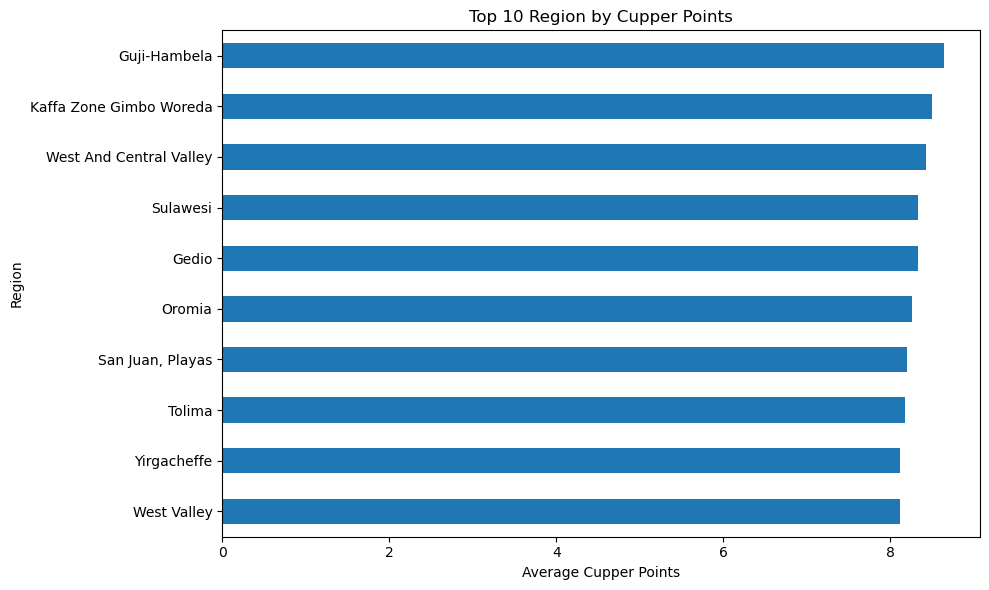

In [418]:
import matplotlib.pyplot as plt

top_10_region.plot(kind='barh', figsize=(10, 6), title='Top 10 Region by Cupper Points')
plt.xlabel('Average Cupper Points')
plt.ylabel('Region')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


In [410]:
 df_merged['Region_Country'] = df_merged['Region'] + ' (' + df_merged['Country_of_Origin'] + ')'


C:\Users\sarah\AppData\Local\Temp\ipykernel_8328\2704263847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Region_Country'] = df_merged['Region'] + ' (' + df_merged['Country_of_Origin'] + ')'


In [414]:
region_country_avg = df_merged.groupby('Region_Country')['Cupper_Points'].mean().sort_values(ascending=False)
top_10 = region_country_avg.head(10)
top_10

Region_Country
Guji-Hambela (Ethiopia)                 8.636667
Kaffa Zone Gimbo Woreda (Ethiopia)      8.500000
West And Central Valley (Costa Rica)    8.420000
Sulawesi (Indonesia)                    8.330000
Gedio (Ethiopia)                        8.330000
Oromia (Ethiopia)                       8.264545
Antioquia (United States)               8.236667
San Juan, Playas (Ecuador)              8.205000
Tolima (Colombia)                       8.170000
Yirgacheffe (Ethiopia)                  8.125000
Name: Cupper_Points, dtype: float64

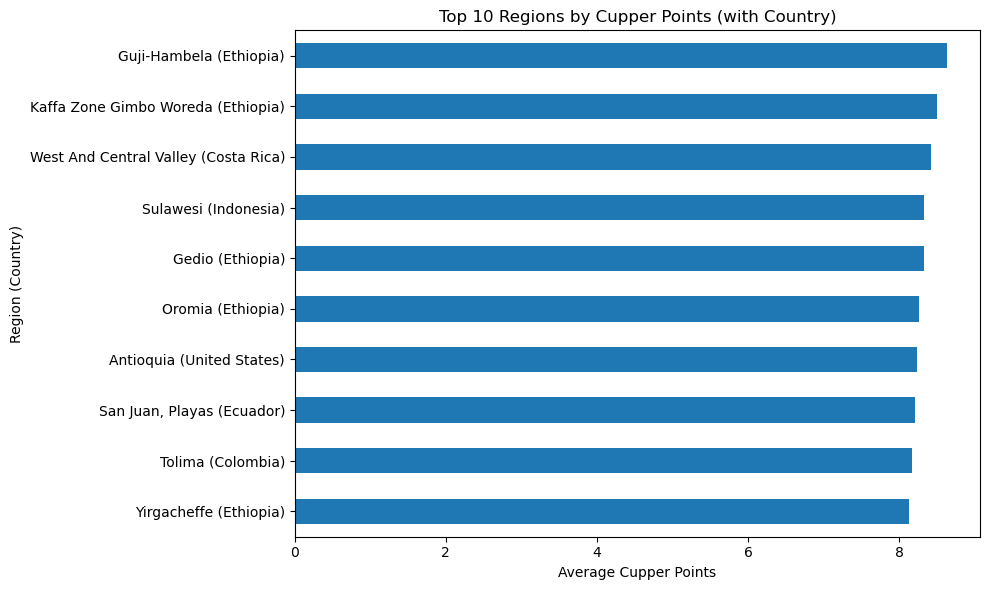

In [420]:
top_10.plot(kind='barh', figsize=(10, 6), title='Top 10 Regions by Cupper Points (with Country)')
plt.xlabel('Average Cupper Points')
plt.ylabel('Region (Country)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [422]:
df_merged.columns

Index(['Species', 'Owner', 'Country_of_Origin', 'Farm_Name', 'Company',
       'Region', 'Producer', 'Number_of_Bags', 'Bag_Weight',
       'In_Country_Partner', 'Harvest_Year', 'Grading_Date',
       'Processing_Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean_Cup', 'Sweetness', 'Cupper_Points',
       'Total_Cup_Points', 'Moisture', 'Category_One_Defects', 'Quakers',
       'Color', 'Category_Two_Defects', 'Expiration', 'Unit_Of_Measurement',
       'Altitude_Mean_Meters', 'High_Quality', 'Region_Country'],
      dtype='object')

+ The sum of these individual scores becomes the Total_Cup_Points.
+ 85+ points → often classified as "Specialty Grade" coffee
+ Used by buyers and roasters to judge overall quality
+ A high Total_Cup_Points usually means excellent balance, complexity, and cleanliness
+ Total_Cup_Points is the final verdict on how good the coffee is, based on a standardized sensory scoring system